# 1. 필요한 라이브러리 설치

In [13]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
from inspect import findsource
def get_font_family():
    '''
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    '''
    import platform
    system_name = platform.system()

    if system_name == 'Darwin' :
        font_family = 'AppleGothic'
    elif system_name == 'Windows':
        font_family = 'Malgun Gothic'
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = 'NanumBarunGothic'

    return font_family

In [15]:
# style 설정은 꼭 폰트설정 위에서 한다. 
# style에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 깨진다.
plt.style.use('seaborn')

#폰트설정
plt.rc('font', family=get_font_family())

#마이너스폰트 설정
plt.rc('axes', unicode_minus=False)

# 그래프에 retina display 적용
# 그래프 해상도 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/var/folders/5v/6byb3xz548v1xd0b83z24ys40000gn/T/ipykernel_1352/1790882891.py:14: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


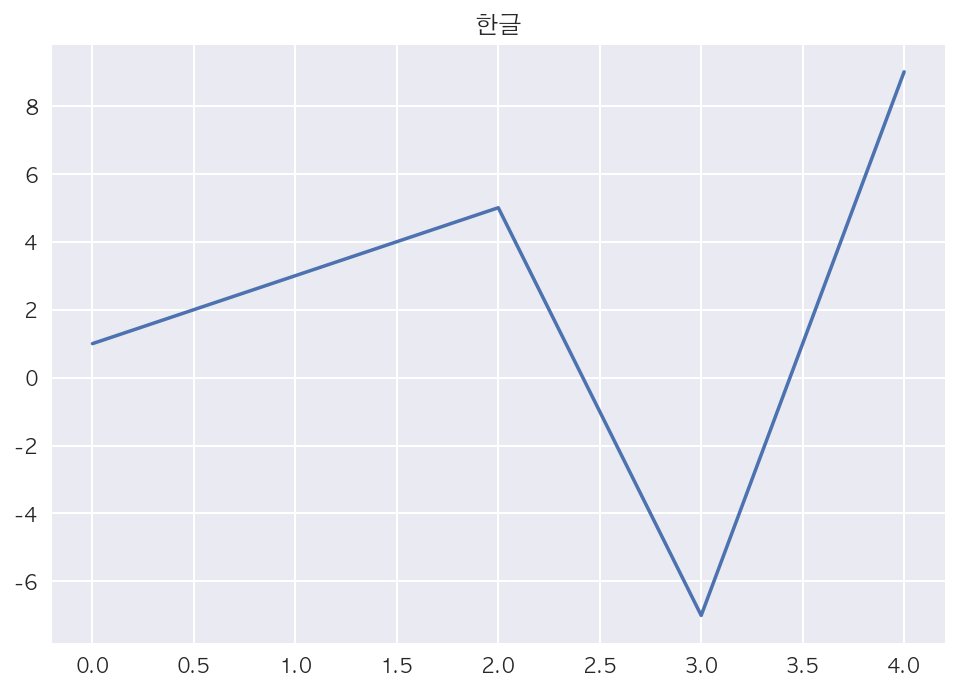

In [16]:
#한글폰트 동작확인
pd.Series([1,3,5,-7,9]).plot(title='한글');

# 2. EDA

In [17]:
popular_items = pd.read_csv('/Users/cmblir/Python/Musinsa-Analysis/Crawled files/popular_items.csv')

In [18]:
popular_items.head(10)

,category,popular_items_brand_name
0,데님팬츠,반스
1,데님팬츠,컨버스
2,데님팬츠,브랜즈
3,데님팬츠,반스
4,데님팬츠,컨버스
5,데님팬츠,컨버스
6,데님팬츠,커스텀에이드
7,데님팬츠,반스
8,데님팬츠,올리버커스텀
9,데님팬츠,반스


In [19]:
popular_items['category'].value_counts()

데님팬츠          810
코튼팬츠          810
긴팔 티셔츠        810
컨버스/단화        810
로퍼            810
선글라스          810
러닝화/피트니스화     810
민소매 티셔츠       810
슈트 팬츠/슬랙스     810
트레이닝/조거 팬츠    810
향수/탈취         810
캠핑용품          810
Name: category, dtype: int64

In [20]:
lopper = popular_items[popular_items.category == '로퍼'].value_counts()[:10]

<AxesSubplot:xlabel='category,popular_items_brand_name'>

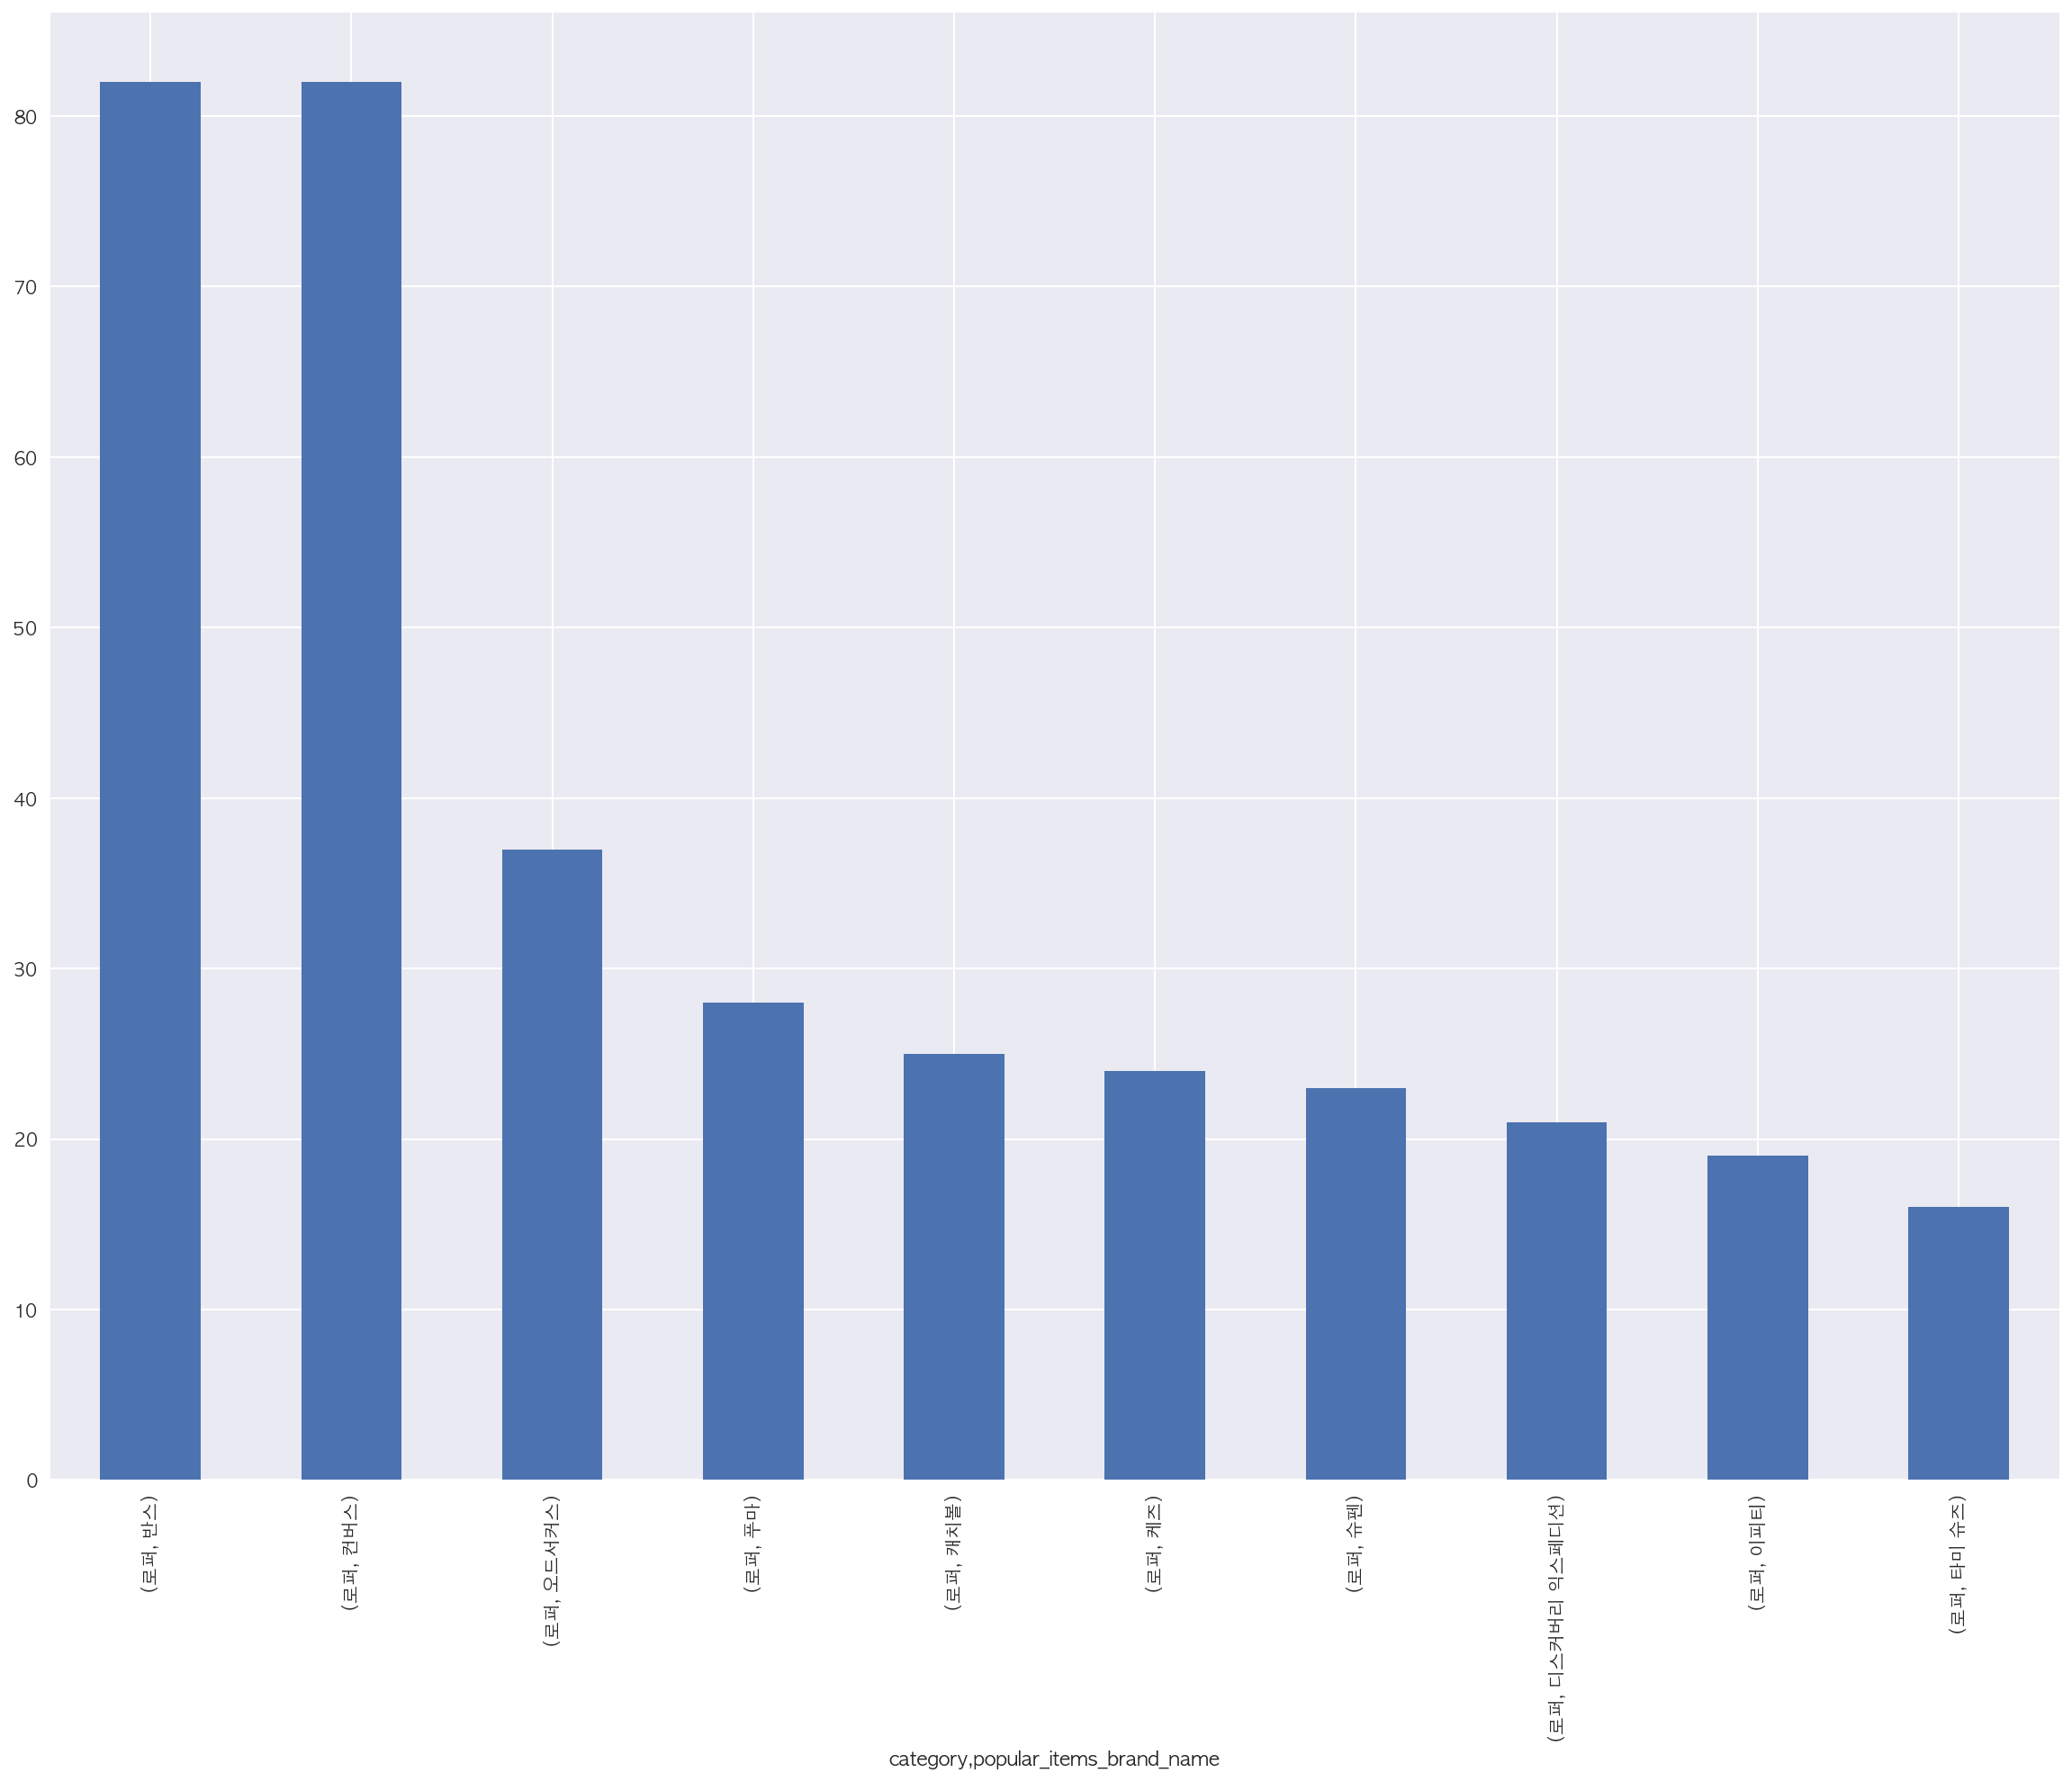

In [21]:
lopper.transpose().plot(kind='bar', figsize=(20,15), fontsize = 10)

In [22]:
!pip install konlpy

In [23]:
!pip install wordcloud

In [24]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [25]:
reviews = pd.read_csv("/Users/cmblir/Python/Musinsa-Analysis/Crawled files/reviews.csv")

In [26]:
reviews.head()

,category,review_type,rating,consumer,consumer rating,brand_name,review
0,상의,낮은 평점,4.9,"남성, 170cm, 90kg",3.0,푸마 셀렉트,조금 작습니다 ㅜㅜ 한치수 크게살걸 그랬습니다 아쉽네요
1,상의,낮은 평점,4.9,"남성, 175cm, 69kg",3.0,푸마 셀렉트,무적권 사세요…핏이 진짜 이쁘고 소재도 밀도가 높아서 오버한 핏이 잘잡힘\r\n\r...
2,상의,낮은 평점,4.9,"남성, 174cm, 75kg",4.0,푸마 셀렉트,후드티라 더 더워지기전에 자주 입을것 같아 만족합니다
3,상의,낮은 평점,4.9,"남성, 170cm, 60kg",4.0,푸마 셀렉트,꽤나 두껍네요. 늦봄까지 입기엔 글쎄요 하지만 옷이 이뻐서 그래도 더울것같네요
4,상의,낮은 평점,4.9,"남성, 178cm, 75kg",4.0,푸마 셀렉트,두껍지 않지만 탄탄한 후드입니다 몸 기장과 팔 기장이 통에 비해 길진 x


In [27]:
bad_reviews = reviews[reviews.review_type == '낮은 평점']

In [28]:
good_reviews = reviews[reviews.review_type == '높은 평점']

In [29]:
text = reviews["review"]

In [30]:
bad_reviews.to_csv('bad_reviews.txt', index = False, header = None)
good_reviews.to_csv('good_reviews.txt', index = False, header = None)

In [31]:
text.to_csv('reviews.txt', index = False, header = None)

In [32]:
from konlpy.tag import Okt

In [33]:
Okt = Okt()
text = open('reviews.txt').read()
bad_reviews = open('bad_reviews.txt').read()
good_reviews = open('good_reviews.txt').read()
sentences_tag = []
sentences_tag = Okt.pos(text)
bad_sentences_tag = Okt.pos(bad_reviews)
good_sentences_tag = Okt.pos(good_reviews)

In [34]:
import platform
print(platform.architecture())

('64bit', '')


In [35]:
noun_adj_list = []

for word, tag in sentences_tag:
    if tag in ['Noun' , 'Adjective']: 
        noun_adj_list.append(word)

In [36]:
good_noun_adj_list = []

for word, tag in good_sentences_tag:
    if tag in ['Noun' , 'Adjective']: 
        good_noun_adj_list.append(word)

In [37]:
bad_noun_adj_list = []

for word, tag in bad_sentences_tag:
    if tag in ['Noun' , 'Adjective']: 
        bad_noun_adj_list.append(word)

# 3. 데이터 시각화

### 중간 파일 점검

1. 단순 리뷰 : reviews.txt
2. 나쁜 리뷰 : bad_reviews.txt
3. 좋은 리뷰 : good_reveiews.txt

In [38]:
counts = Counter(noun_adj_list)
tags = counts.most_common(40) 


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
wc = WordCloud(font_path=get_font_family(),background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))


# 생성된 WordCloud를 test.jpg로 보낸다.
cloud.to_file('text.jpg')

In [39]:
counts = Counter(good_noun_adj_list)
good_tags = counts.most_common(40) 


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
good_wc = WordCloud(font_path=get_font_family(),background_color="white", max_font_size=60)
good_cloud = good_wc.generate_from_frequencies(dict(good_tags))


# 생성된 WordCloud를 test.jpg로 보낸다.
good_cloud.to_file('good_text.jpg')

In [40]:
counts = Counter(bad_noun_adj_list)
bad_tags = counts.most_common(40) 


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
bad_wc = WordCloud(font_path=get_font_family(),background_color="white", max_font_size=60)
bad_cloud = bad_wc.generate_from_frequencies(dict(bad_tags))


# 생성된 WordCloud를 test.jpg로 보낸다.
bad_cloud.to_file('bad_text.jpg')

In [41]:
import matplotlib.pyplot as plt

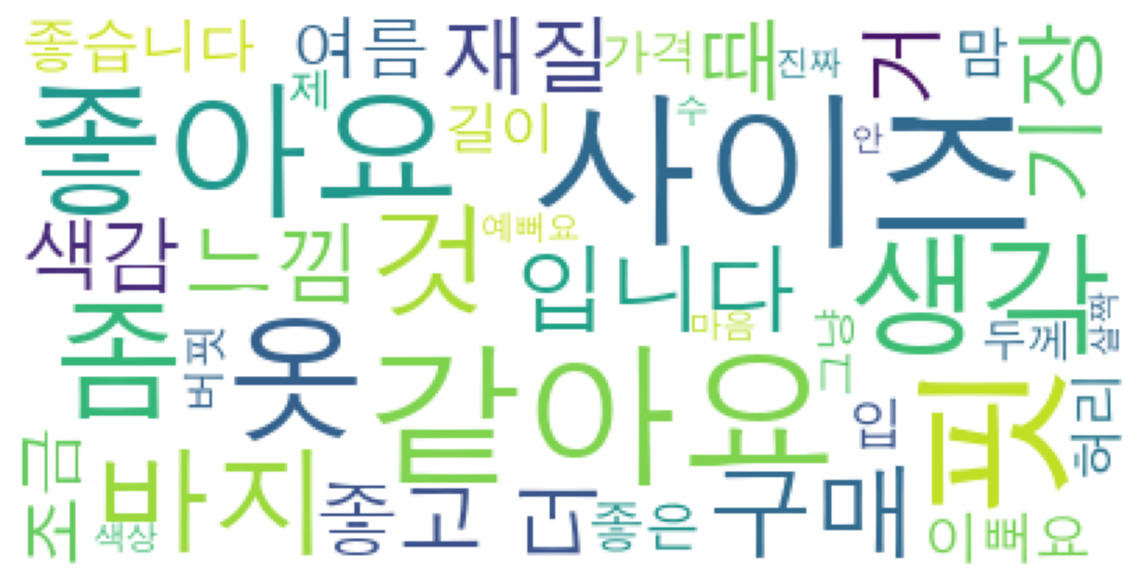

In [42]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

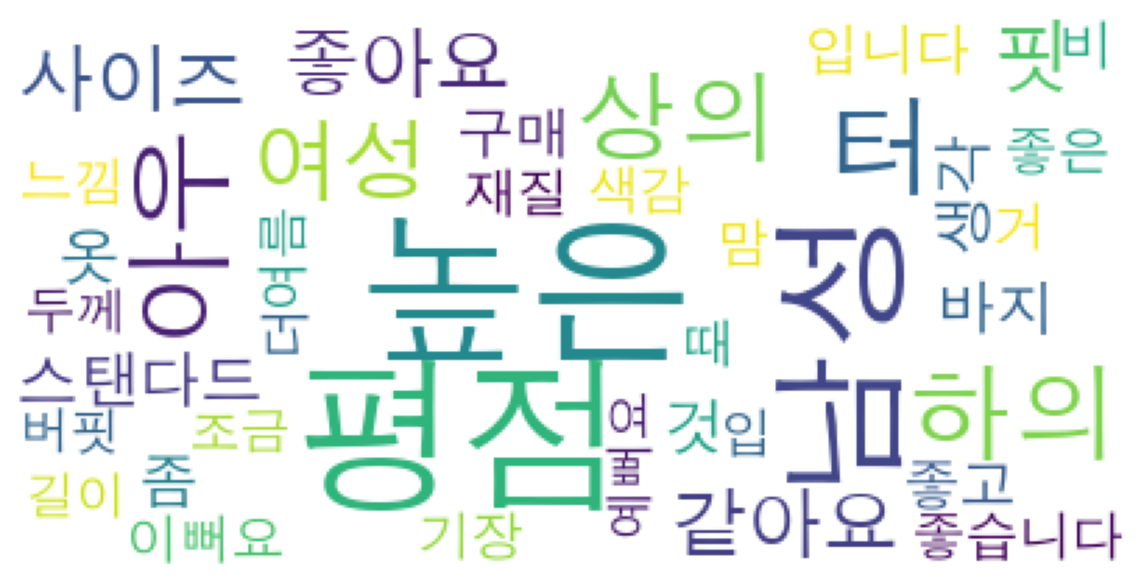

In [43]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(good_cloud)
plt.show()

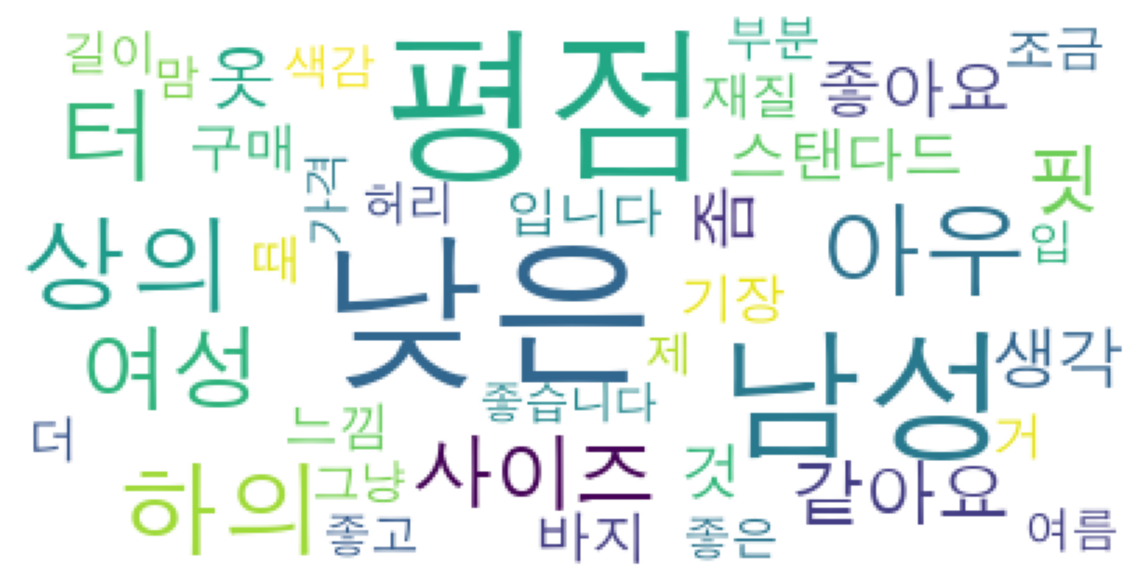

In [44]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(bad_cloud)
plt.show()

In [45]:
top10 = [i for i in tags[:10]]
top10

[('사이즈', 3987),
 ('핏', 3797),
 ('같아요', 3426),
 ('좋아요', 3024),
 ('옷', 2701),
 ('생각', 2509),
 ('좀', 2438),
 ('것', 2258),
 ('바지', 1913),
 ('구매', 1775)]

In [46]:
names_after = []
cnt_after = []
for i in top10:
  cnt_after.append(i[1])
  names_after.append(i[0])

In [47]:
good_top10 = [i for i in good_tags[:10]]
good_top10

[('높은', 8374),
 ('평점', 8370),
 ('남성', 6267),
 ('터', 3037),
 ('아우', 3031),
 ('하의', 2883),
 ('상의', 2610),
 ('여성', 2026),
 ('핏', 1566),
 ('사이즈', 1448)]

In [48]:
bad_top10 = [i for i in bad_tags[:10]]
bad_top10

[('낮은', 12560),
 ('평점', 12547),
 ('남성', 9134),
 ('상의', 4367),
 ('터', 4245),
 ('아우', 4235),
 ('하의', 4212),
 ('여성', 3405),
 ('사이즈', 2539),
 ('핏', 2252)]

In [49]:
stopwords = ['좋아요', '옷', '좀', '것', '바지', '구매', '같아요', '생각', '터', '구매', '아우', '평점']

In [50]:
unique_Noun_words = set(noun_adj_list)
for word in unique_Noun_words:
    if word in stopwords:
        while word in noun_adj_list: noun_adj_list.remove(word)

In [51]:
from collections import Counter
c = Counter(noun_adj_list)

In [52]:
tmp = [] # 불용어 사전에 추가적으로 들어가기 전 작업할 리스트
for i in c.most_common(100): # 상위 100개 항목 리스트 넣기
  tmp.append(i[0])

In [53]:
tmp

['사이즈',
 '핏',
 '입니다',
 '기장',
 '느낌',
 '때',
 '재질',
 '더',
 '거',
 '좋고',
 '색감',
 '여름',
 '조금',
 '좋습니다',
 '이뻐요',
 '입',
 '좋은',
 '길이',
 '맘',
 '허리',
 '가격',
 '버핏',
 '두께',
 '제',
 '그냥',
 '예뻐요',
 '진짜',
 '마음',
 '살짝',
 '수',
 '안',
 '색상',
 '부분',
 '이쁘고',
 '좋네요',
 '제품',
 '추천',
 '정도',
 '무난',
 '감',
 '색',
 '아주',
 '디자인',
 '정말',
 '비',
 '편하게',
 '약간',
 '사진',
 '자주',
 '같습니다',
 '가성',
 '저',
 '티',
 '소재',
 '배송',
 '처음',
 '만족합니다',
 '이',
 '다른',
 '봄',
 '편하고',
 '얇아서',
 '하나',
 '어깨',
 '있어서',
 '크게',
 '용',
 '별로',
 '예쁘고',
 '원단',
 '듯',
 '통',
 '와이드',
 '지금',
 '이쁩니다',
 '완전',
 '있는',
 '키',
 '같은',
 '마감',
 '고민',
 '요즘',
 '날씨',
 '상품',
 '커서',
 '스타일',
 '요',
 '같네요',
 '역시',
 '있어요',
 '포인트',
 '오버',
 '팔',
 '후기',
 '듭니',
 '목',
 '운동',
 '분',
 '다만',
 '색깔']

In [54]:
add_stopwords = ["좋고", "입니다", "더", "좋습니다", "거", "떄", "좋은", "맘", "입", "비", "길이", "조금", "진짜", "마음", "수", "제", "아주", "살짝", "자주", "감", "정말", "안", "같습니다", "드", "정도", "그냥", "코드", "티", "약간", "어", "하나", "얇아서", "라피", "저", "낫", "지금", "요즘", "처음", "이",
                 "있어서", "디스", "완전", "버댓", "부분", "다른", "용", "역시", "굿", "키", "고민", "있는", "사진", "크게", "있어요", "듭니다", "어깨", "에스"]
for i in add_stopwords:
  stopwords.append(i)

In [55]:
unique_Noun_words = set(noun_adj_list)
for word in unique_Noun_words:
    if word in stopwords:
        while word in noun_adj_list: noun_adj_list.remove(word)

In [56]:
from collections import Counter
c = Counter(noun_adj_list)
tmp = [] # 불용어 사전에 추가적으로 들어가기 전 작업할 리스트
for i in c.most_common(100): # 상위 100개 항목 리스트 넣기
  tmp.append(i[0])

In [57]:
tmp

['사이즈',
 '핏',
 '기장',
 '느낌',
 '때',
 '재질',
 '색감',
 '여름',
 '이뻐요',
 '허리',
 '가격',
 '버핏',
 '두께',
 '예뻐요',
 '색상',
 '이쁘고',
 '좋네요',
 '제품',
 '추천',
 '무난',
 '색',
 '디자인',
 '편하게',
 '가성',
 '소재',
 '배송',
 '만족합니다',
 '봄',
 '편하고',
 '별로',
 '예쁘고',
 '원단',
 '듯',
 '통',
 '와이드',
 '이쁩니다',
 '같은',
 '마감',
 '날씨',
 '상품',
 '커서',
 '스타일',
 '요',
 '같네요',
 '포인트',
 '오버',
 '팔',
 '후기',
 '듭니',
 '목',
 '운동',
 '분',
 '다만',
 '색깔',
 '편이',
 '주문',
 '얇고',
 '코디',
 '만족',
 '지퍼',
 '품',
 '셔츠',
 '세탁',
 '색도',
 '블랙',
 '좋은데',
 '교환',
 '걸',
 '이쁘네요',
 '퀄리티',
 '대비',
 '냄새',
 '가을',
 '또',
 '허벅지',
 '착용',
 '전체',
 '로고',
 '후드',
 '이뻐서',
 '일단',
 '한번',
 '번',
 '적당히',
 '해',
 '너',
 '데',
 '있습니다',
 '참고',
 '자체',
 '편',
 '적당하고',
 '구입',
 '예쁩니다',
 '도',
 '얇은',
 '엉덩이',
 '프린팅',
 '좋아서',
 '전']

In [58]:
add_stopwords = ['높은','남성','하의','상의','여성','스탠다드','이뻐요','때','예뻐요','버핏','이쁘고','스토어','좋네요','편하게',
 '무난','편하고','만족합니다','예일','소재','날씨','제품','예쁘고','이쁩니다','듭니','이쁘네요','색도','통','최고','듯',
 '토피','만족','와릿이즌','그레이','리','같네요','같은','오버','적당히','적당하고','적당한','이뻐서','요','가을','나인','별로','아디다스','팔','셔츠','예쁩니다','편이','엘무드',
 '엄브로','트','분','스튜디오','폴로','후드','품','커서','피오','블랙','도','가디건','또','원하던','얇고','편해요','예뻐서','스컬','프터','상품','걱정']
for i in add_stopwords:
  stopwords.append(i)

In [59]:
unique_Noun_words = set(noun_adj_list)
for word in unique_Noun_words:
    if word in stopwords:
        while word in noun_adj_list: noun_adj_list.remove(word)

In [60]:
counts = Counter(noun_adj_list)
tags = counts.most_common(40) 


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
wc = WordCloud(font_path=get_font_family(),background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))


# 생성된 WordCloud를 test.jpg로 보낸다.
cloud.to_file('stopwords_add_text.jpg')

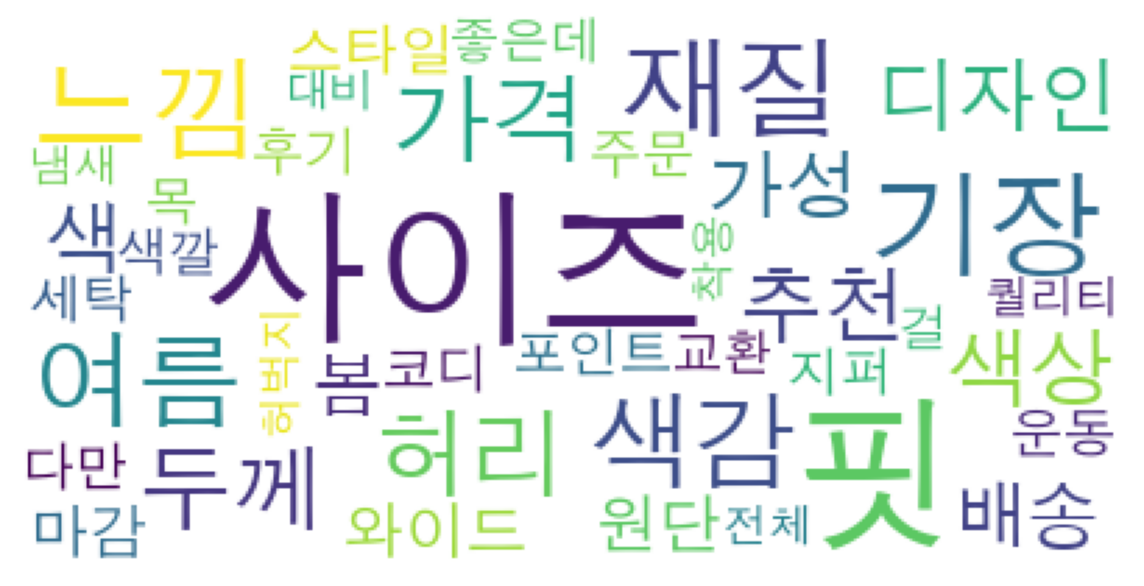

In [61]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [62]:
top10 = [i for i in tags[:10]]
top10

[('사이즈', 3987),
 ('핏', 3797),
 ('기장', 1616),
 ('느낌', 1521),
 ('재질', 1476),
 ('색감', 1360),
 ('여름', 1330),
 ('허리', 1128),
 ('가격', 1121),
 ('두께', 1023)]

In [63]:
names = []
cnt = []
for i in top10:
  cnt.append(i[1])
  names.append(i[0])

<BarContainer object of 10 artists>

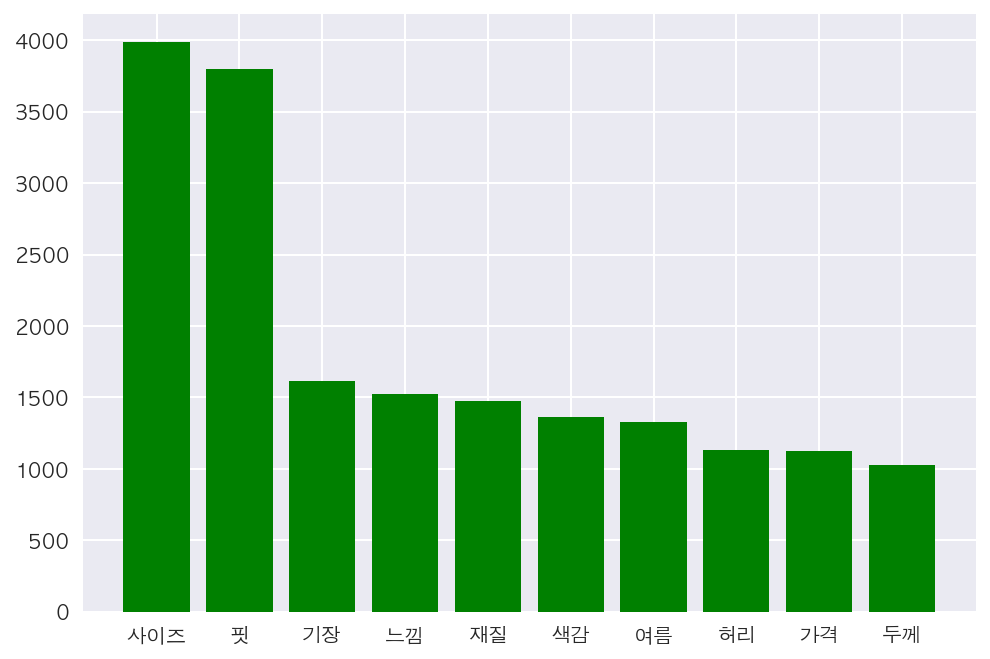

In [64]:
plt.bar(names, cnt, color = 'g') # 모든 리뷰 데이터에서 언급되는 전처리 이후 상위 10개 단어

<BarContainer object of 10 artists>

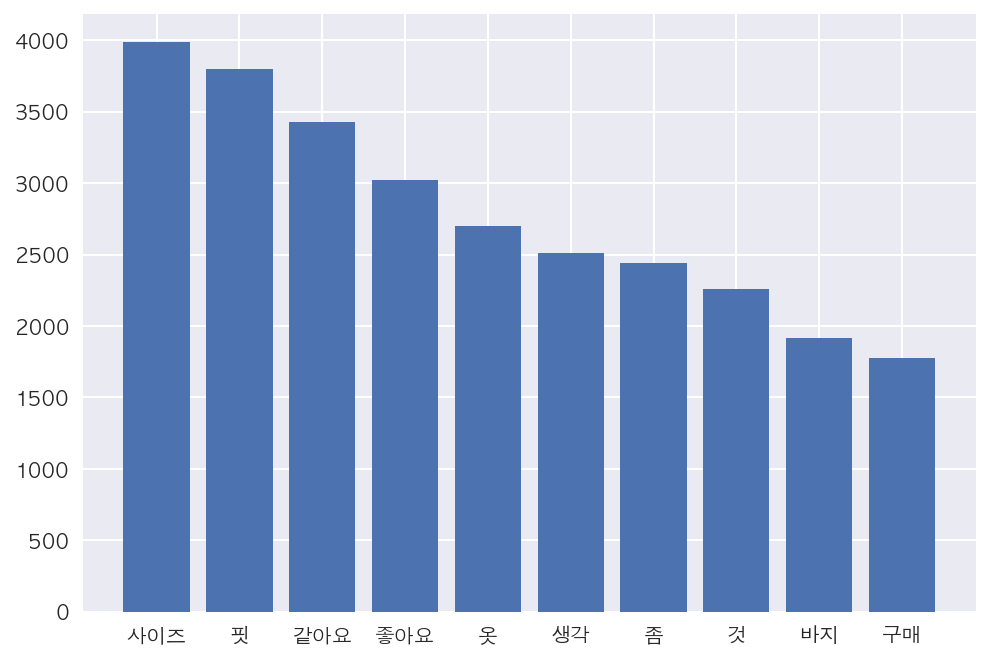

In [65]:
plt.bar(names_after, cnt_after) # 모든 리뷰 데이터에서 언급되는 전처리 이전 상위 10개 단어

# 번외. 워드 클라우드 가독성을 위한 추가 불용어 사전

In [66]:
from collections import Counter
c = Counter(noun_adj_list)
tmp = [] # 불용어 사전에 추가적으로 들어가기 전 작업할 리스트
for i in c.most_common(100): # 상위 100개 항목 리스트 넣기
  tmp.append(i[0])

In [67]:
tmp

['사이즈',
 '핏',
 '기장',
 '느낌',
 '재질',
 '색감',
 '여름',
 '허리',
 '가격',
 '두께',
 '색상',
 '추천',
 '색',
 '디자인',
 '가성',
 '배송',
 '봄',
 '원단',
 '와이드',
 '마감',
 '스타일',
 '포인트',
 '후기',
 '목',
 '운동',
 '다만',
 '색깔',
 '주문',
 '코디',
 '지퍼',
 '세탁',
 '좋은데',
 '교환',
 '걸',
 '퀄리티',
 '대비',
 '냄새',
 '허벅지',
 '착용',
 '전체',
 '로고',
 '일단',
 '한번',
 '번',
 '해',
 '너',
 '데',
 '있습니다',
 '참고',
 '자체',
 '편',
 '구입',
 '얇은',
 '엉덩이',
 '프린팅',
 '좋아서',
 '전',
 '레이어',
 '좋을',
 '브랜드',
 '개',
 '위',
 '보풀',
 '있을',
 '보고',
 '주머니',
 '이쁘게',
 '로',
 '예쁜',
 '단추',
 '겨울',
 '크롭',
 '니트',
 '매우',
 '앞',
 '막',
 '청바지',
 '기본',
 '중',
 '이즈',
 '입을거',
 '점',
 '평소',
 '보리',
 '있고',
 '질',
 '손',
 '뭐',
 '입을게요',
 '소매',
 '괜찮은',
 '때문',
 '같아서',
 '예쁘게',
 '괜찮아요',
 '컬러',
 '팬츠',
 '날',
 '티셔츠',
 '살']

In [68]:
good_unique_Noun_words = set(good_noun_adj_list)
for word in good_unique_Noun_words:
    if word in stopwords:
        while word in good_noun_adj_list: good_noun_adj_list.remove(word)

In [69]:
counts = Counter(good_noun_adj_list)
good_tags = counts.most_common(40) 


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
good_wc = WordCloud(font_path=get_font_family(),background_color="white", max_font_size=60)
good_cloud = good_wc.generate_from_frequencies(dict(good_tags))


# 생성된 WordCloud를 test.jpg로 보낸다.
good_cloud.to_file('good_text.jpg')

In [70]:
good_top10 = [i for i in good_tags[:10]]
good_top10

[('핏', 1566),
 ('사이즈', 1448),
 ('기장', 596),
 ('여름', 583),
 ('색감', 578),
 ('재질', 540),
 ('느낌', 520),
 ('두께', 430),
 ('허리', 395),
 ('가격', 393)]

In [71]:
good_names = []
good_cnt = []
for i in good_top10:
  good_cnt.append(i[1])
  good_names.append(i[0])

<BarContainer object of 10 artists>

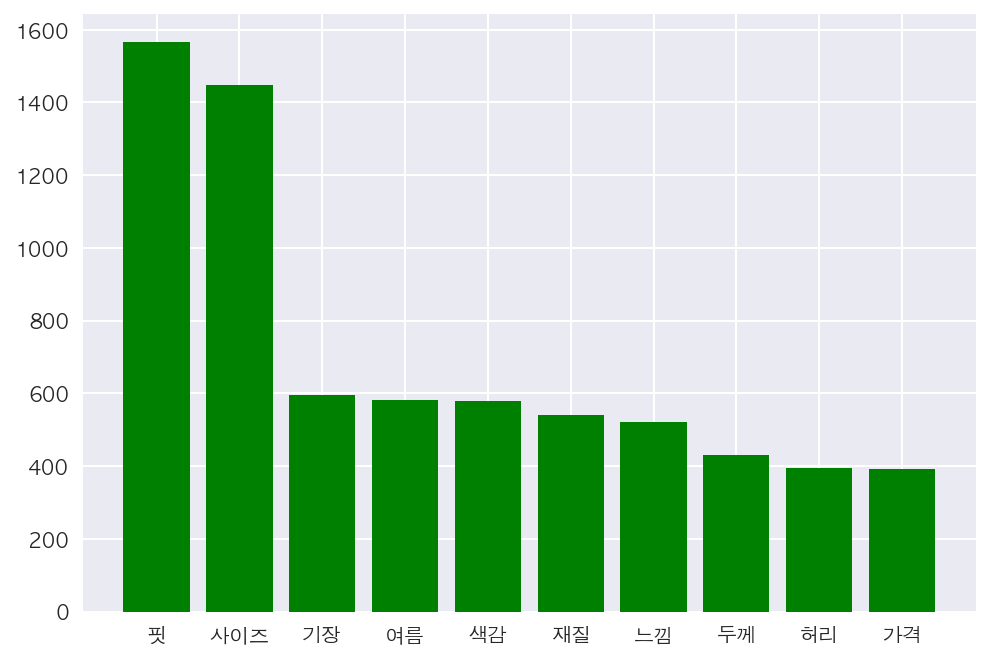

In [72]:
plt.bar(good_names, good_cnt, color = 'g') # 모든 리뷰 데이터에서 언급되는 전처리 이후 상위 10개 단어

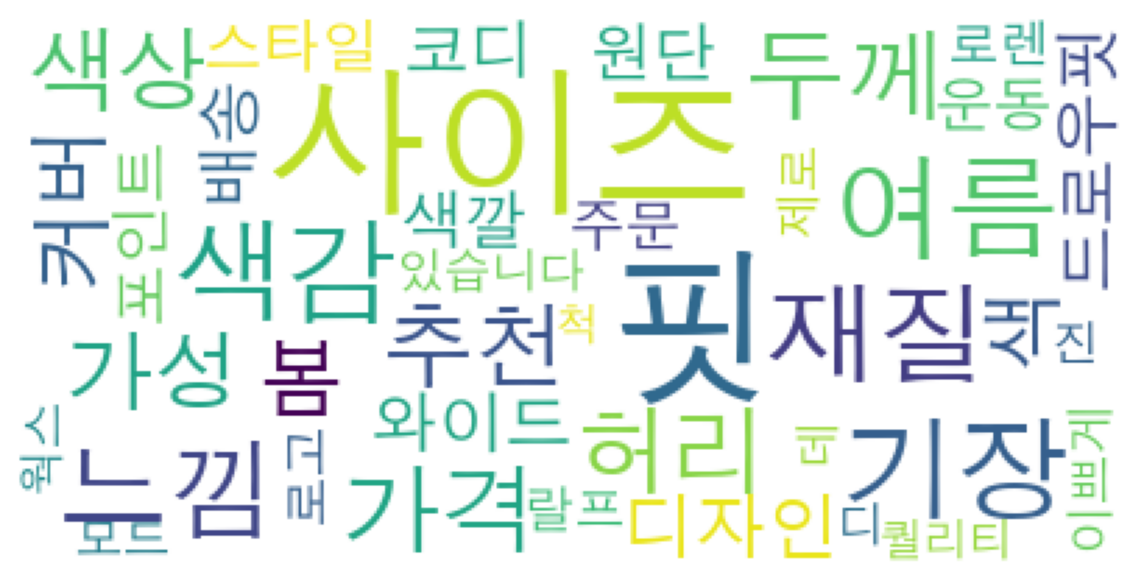

In [73]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(good_cloud)
plt.show()

In [74]:
bad_unique_Noun_words = set(bad_noun_adj_list)
for word in bad_unique_Noun_words:
    if word in stopwords:
        while word in bad_noun_adj_list: bad_noun_adj_list.remove(word)

In [75]:
counts = Counter(bad_noun_adj_list)
bad_tags = counts.most_common(40) 


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
bad_wc = WordCloud(font_path=get_font_family(),background_color="white", max_font_size=60)
bad_cloud = bad_wc.generate_from_frequencies(dict(bad_tags))


# 생성된 WordCloud를 test.jpg로 보낸다.
bad_cloud.to_file('bad_text.jpg')

In [76]:
bad_top10 = [i for i in bad_tags[:10]]
bad_top10

[('낮은', 12560),
 ('사이즈', 2539),
 ('핏', 2252),
 ('기장', 1020),
 ('느낌', 1001),
 ('재질', 936),
 ('색감', 782),
 ('여름', 747),
 ('허리', 733),
 ('가격', 728)]

In [77]:
bad_names = []
bad_cnt = []
for i in bad_top10:
  bad_cnt.append(i[1])
  bad_names.append(i[0])

<BarContainer object of 10 artists>

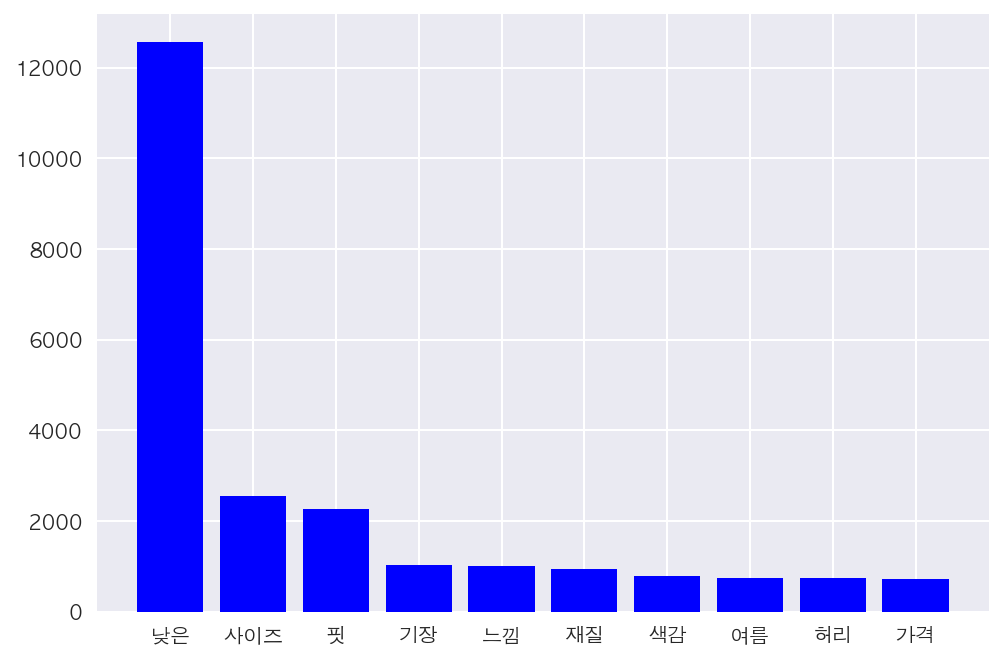

In [78]:
plt.bar(bad_names, bad_cnt, color = 'b') # 모든 리뷰 데이터에서 언급되는 전처리 이후 상위 10개 단어

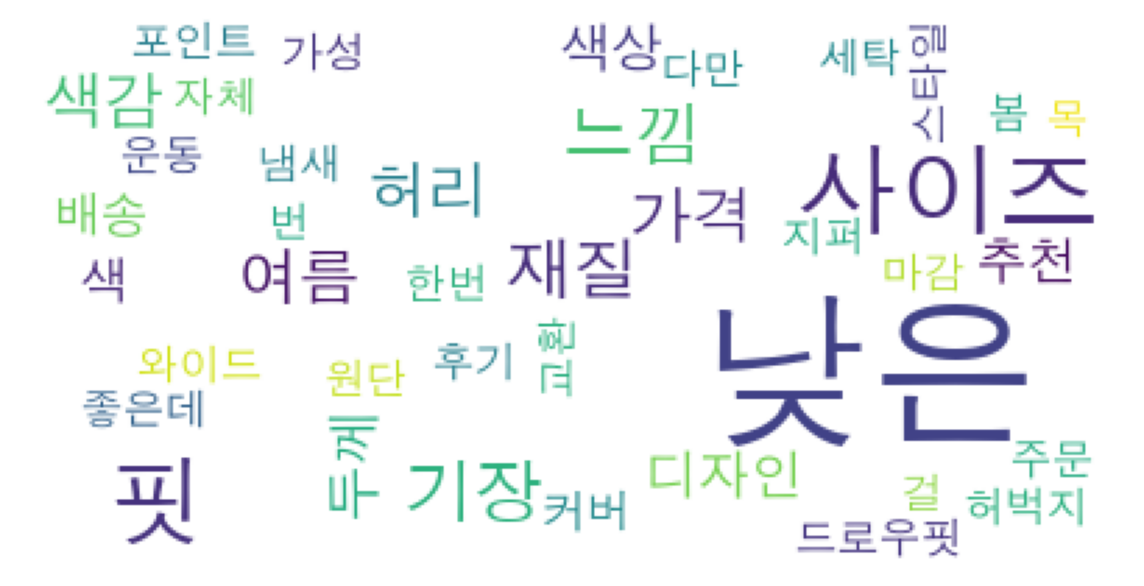

In [79]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(bad_cloud)
plt.show()

# 4. TF-IDF로 단어간 유사도 검사

In [ ]:
docs = text
vocab = list(set(w for doc in docs for w in doc.split()))

# 총 문서의 수
N = len(docs)

In [ ]:
from math import log

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))

def tfidf(t, d):
  return tf(t, d) * idf(t)

In [ ]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)

In [ ]:
tf_

,묻,세,팬,딱,챘,톤,교,톱,뱅,욜,...,뜻,혼,긔,캬,쌍,뎁,z,끗,뿝,잖
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1176993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1176994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1176995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

NameError: name 'vocab' is not defined